In [1]:
import pandas as pd
import numpy as np
import requests
from urllib.parse import urlencode
from datetime import timedelta

Cразу загрузим все датасеты и объеденим в один

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg' 
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [3]:
orders = pd.read_csv(download_url)

In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig' 
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [5]:
customers = pd.read_csv(download_url)

In [6]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw' 
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [7]:
items = pd.read_csv(download_url)

In [8]:
df = customers.merge(orders, on='customer_id')

In [9]:
df = df.merge(items, on='order_id')

In [10]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


# 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

Я буду считать за покупку факт оплаты заказа клиентом.  Т.е., в столбце "order_approved_at" должно стоять время подтверждения оплаты заказа.

Оставляем в датафрейме только те строки, где в столбце "order_approved_at" есть время подтверждения оплаты заказа.

In [11]:
df['order_approved_at'] = df.order_approved_at.fillna(0)

In [12]:
df = df.query('order_approved_at != 0')

И считаем количество пользователей, совершивших покупку один раз.

In [13]:
df.groupby('customer_unique_id', as_index=False)\
    .agg({'order_id': 'count'})\
    .query('order_id == 1')\
    .order_id\
    .count()   

83540

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [14]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at']) 
df['month'] = df['order_purchase_timestamp'].to_numpy().astype('datetime64[M]')

In [15]:
df1 = df.query('order_status != "delivered"')\
    .groupby(['month', 'order_status'], as_index=False)\
    .agg({'customer_state': 'count'})
df1= pd.pivot_table(df1, values='customer_state', index='month',
                    columns='order_status')
df1['mean_per_month'] = df1.mean(axis=1)
df1

order_status,approved,canceled,invoiced,processing,shipped,unavailable,mean_per_month
month,,,,,,,
2016-09-01,NaN,1.0,NaN,NaN,2.0,NaN,1.500000
2016-10-01,NaN,14.0,19.0,2.0,8.0,7.0,10.000000
2017-01-01,NaN,2.0,13.0,9.0,18.0,NaN,10.500000
2017-02-01,2.0,15.0,16.0,37.0,23.0,NaN,18.600000
2017-03-01,NaN,25.0,3.0,27.0,48.0,NaN,25.750000
2017-04-01,1.0,24.0,16.0,17.0,57.0,NaN,23.000000
2017-05-01,NaN,30.0,19.0,24.0,59.0,NaN,33.000000
2017-06-01,NaN,12.0,13.0,18.0,51.0,NaN,23.500000
2017-07-01,NaN,26.0,7.0,12.0,58.0,NaN,25.750000


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)# 

In [16]:
df['day'] = df['order_approved_at'].dt.dayofweek
df = df.replace({'day' : { 0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',
                    3 : 'Thursday', 4: 'Friday', 5 : 'Saturday', 6 : 'Sunday'}})

In [17]:
best_day = df.groupby('product_id', as_index=False)\
    .agg({'day': pd.Series.mode})
best_day

,product_id,day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Friday
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32943,fff6177642830a9a94a0f2cba5e476d1,"[Monday, Saturday]"
32944,fff81cc3158d2725c0655ab9ba0f712c,Monday
32945,fff9553ac224cec9d15d49f5a263411f,Saturday
32946,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)# 

In [18]:
df['weeks'] = df.month.dt.daysinmonth/7 #Добавляем столбец с количеством дней в каждом месяце

In [19]:
df1 = df.groupby(['customer_unique_id', 'month', 'weeks'], as_index=False)\
    .agg({'order_id':'count'})

In [20]:
df1['mean'] = df1.order_id/df.weeks # считаем среднее в неделю для каждого заказа в каждый месяц

In [21]:
pd.pivot(df1, values='mean', index='customer_unique_id',
                    columns='month')

month,2016-09-01,2016-10-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,...,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN
0000f46a3911fa3c0805444483337064,NaN,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000f6ccb0745a6a4b88665a16c9f078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004aac84e0df4da2b147fca70cf8255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.451613,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffea47cd6d3cc0a88bd621562a9d061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.233333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffff371b4d645b6ecea244b27531430a,NaN,NaN,NaN,NaN,0.225806,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [22]:
df['period'] = df.order_approved_at.apply(lambda x: x.strftime('%Y-%m'))

In [23]:
first_order = df.groupby('customer_unique_id', as_index=False)\
    .agg({'order_approved_at':'min'})\
    .rename(columns={'order_approved_at':'first_order'})

In [24]:
first_order['first_order'] = first_order.first_order.dt.strftime('%Y-%m')

In [25]:
df= df.merge(first_order, on='customer_unique_id')

In [26]:
df['period'] = pd.to_datetime(df.period).dt.to_period('M')
df['first_order'] = pd.to_datetime(df.first_order).dt.to_period('M')

In [27]:
df['month'] = df['period'].sub(df['first_order']).apply(lambda x: x.n)

In [28]:
cohort = df.pivot_table(index='first_order', columns='month', values='customer_unique_id', aggfunc='nunique')

In [29]:
cohort_size = cohort.iloc[:,0]
retention_matrix = cohort.divide(cohort_size, axis=0)

In [30]:
ur_style = (retention_matrix
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_order,,,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,,,
2016-10,100.00%,,,,,,0.33%,,,0.33%,,0.33%,,0.33%,,0.33%,,0.33%,0.65%,0.65%
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.56%,0.28%,0.14%,0.42%,0.14%,0.42%,0.14%,0.14%,,0.28%,0.28%,0.70%,0.42%,0.14%,0.14%,0.28%,0.42%,0.14%,
2017-02,100.00%,0.24%,0.24%,0.18%,0.41%,0.12%,0.24%,0.18%,0.06%,0.18%,0.12%,0.30%,0.12%,0.18%,0.12%,0.06%,0.06%,0.24%,,
2017-03,100.00%,0.50%,0.35%,0.35%,0.35%,0.15%,0.15%,0.31%,0.31%,0.12%,0.38%,0.12%,0.23%,0.12%,0.15%,0.23%,0.08%,0.15%,,
2017-04,100.00%,0.61%,0.22%,0.17%,0.30%,0.26%,0.35%,0.26%,0.35%,0.17%,0.22%,0.09%,0.09%,0.04%,0.09%,0.09%,0.17%,,,
2017-05,100.00%,0.53%,0.48%,0.39%,0.31%,0.34%,0.42%,0.14%,0.25%,0.28%,0.28%,0.34%,0.20%,0.06%,0.20%,0.25%,,,,
2017-06,100.00%,0.48%,0.35%,0.38%,0.26%,0.35%,0.38%,0.22%,0.13%,0.22%,0.32%,0.38%,0.16%,0.13%,0.19%,,,,,


In [31]:
retention_matrix[[3]].idxmax()

month
3    2017-05
dtype: period[M]

# Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [ ]:
orders = df.groupby(['order_id', 'order_approved_at', 'customer_unique_id'])\
            .agg({'price': lambda x: x.sum()}).reset_index()
orders

In [ ]:
NOW = orders['order_approved_at'].max() + timedelta(days=1)

In [ ]:
period = 365

In [ ]:
orders['days_since_order'] = orders['order_approved_at'].apply(lambda x: (NOW - x).days)

In [ ]:
aggr = {
    'days_since_order': lambda x: x.min(),  # количество дней с момента последнего заказа (Recency)
    'order_approved_at': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # общее количество заказов за последний период (Frequency)
}

rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'Recency', 'order_approved_at': 'Frequency'}, inplace=True)

In [ ]:
rfm['Monetary'] = rfm['customer_unique_id'].apply(lambda x: orders[(orders['customer_unique_id'] == x) & \
                                                           (orders['order_approved_at'] >= NOW - timedelta(days=period))]\
                                                           ['price'].sum())
rfm.head()

In [ ]:
rfm = rfm.query('Recency <= 365 and Monetary !=0')

In [ ]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

Значения Frequency в quintiles везде получилось "1". На мой взгляд это неправильно.



In [ ]:
rfm.Frequency.unique()

Поменяю вручную, разбив на следующие категории:

1) Один заказ

2) От двух до четырех заказов

3) От пяти до семи заказов

4) От восьми до десяти

5) Болше десяти заказов

In [ ]:
quintiles = {'Recency': {0.2: 75.0, 0.4: 143.0, 0.6: 208.0, 0.8: 279.0},
 'Frequency': {0.2: 1.0, 0.4: 4.0, 0.6: 7.0, 0.8: 10.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.99, 0.8: 179.8}}
quintiles

In [ ]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [ ]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [ ]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

In [ ]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

# Рецензия преподавателя:

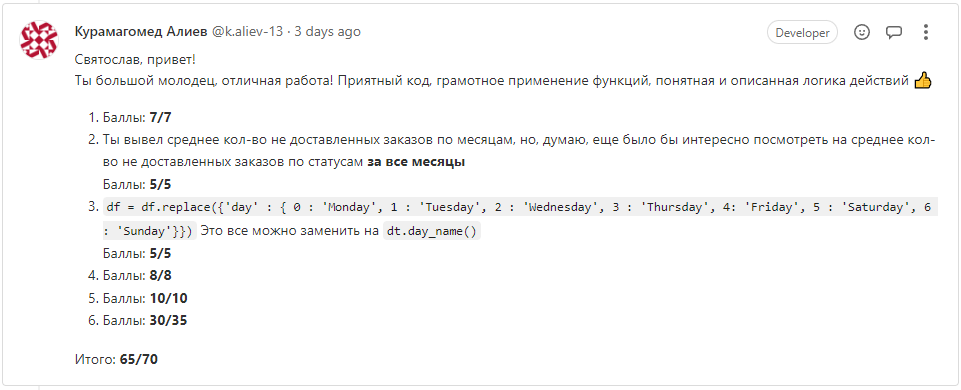